<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#binned" data-toc-modified-id="binned-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>binned</a></span><ul class="toc-item"><li><span><a href="#get-bins" data-toc-modified-id="get-bins-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>get bins</a></span></li><li><span><a href="#plot" data-toc-modified-id="plot-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>plot</a></span></li></ul></li></ul></div>

In [9]:
# standard + plot

# expt variables
channel=creb.CHANNEL
label=creb.IMAGING_LABEL

# styles 
markers=creb.markers
linestyles=creb.linestyles

# labels 
group_labels=creb.labels
GCAMP_label=creb.labels[0]
CREB_label=creb.labels[1]
DN_label=creb.labels[2]

# colors 
colors = creb.colors
GCAMP_color=creb.colors[0]
CREB_color=creb.colors[1]
DN_color=creb.colors[2]

# set seaborn pallette
sns.set_palette(colors)
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("talk")

# stats
%load_ext rpy2.ipython

In [1]:
import lab.analysis.new_intervals as new_inter

In [19]:
exptGrps,roi_filters = creb.load_creb_experiments(filter_type='active') 

LOADED EXPERIMENT GROUPS: CREB,dn-CREB,Control
Using filter...active


# binned

In [59]:
reload(mjdhelp)

<module 'lab.mjd_scripts.helpers' from '/home/matt/code/analysis/lab/mjd_scripts/helpers.py'>

In [24]:
for  ind,row in ints[ints.stop.isna()].iterrows():
    t=row.trial

## get bins

In [60]:

interval_kwargs = {}
kwargs = {}
kwargs.update(interval_kwargs)
binned_intervals = [mjdhelp.bin_intervals(new_inter.stationary_intervals(expt_grp, **kwargs),
                    bin_size=2,resample=True) for expt_grp in exptGrps]
#.iloc[np.arange(0,50)]

In [61]:
binned_intervals[0][0]

,start,stop,trial
0,90,90.0,[]


## plot

TypeError: slice indices must be integers or None or have an __index__ method

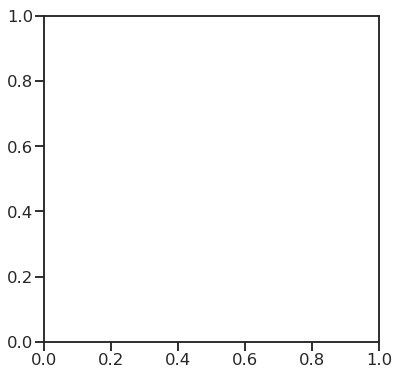

In [39]:
#plot
fig = plt.figure(figsize=(6, 6))
plt.rcParams['figure.facecolor'] = 'white'

n_tran_ax=fig.add_subplot(111)
ntran_roi_filters=roi_filters

groupby=[['expt']]
#roupby=[['expt','roi_id']]
activity_kwargs = [
    {'stat': 'n transients', 'intervals': grp_interval, 'channel': 'Ch2', 'label': 'suite2p_registered'}
    for grp_interval in binned_intervals]#out_intervals]
run_auc_out = plot_metric(
    n_tran_ax, exptGrps, metric_fn=ia.population_activity_by_interval,
    plot_method='hist', roi_filters=ntran_roi_filters, groupby=groupby,
    plotby=None, activity_kwargs=activity_kwargs, activity_label='Average num transients in 2 sec bins',
    label_every_n=1, colors=colors, return_full_dataframes=False,
    rotate_labels=False)
n_tran_ax.legend(loc=(.7, .55), fontsize=legend_fontsize)
n_tran_ax.spines['bottom'].set_linewidth(1)
n_tran_ax.spines['left'].set_linewidth(1)
n_tran_ax.set_title('')
#n_tran_ax.set_xlim()
#n_tran_ax.set_ylim(.6, .03)
#n_tran_ax.set_xticks()